## importing packages

In [23]:
#importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#keras
from keras import *
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from keras.optimizers import  Adam
from keras import regularizers

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Precessing with datas

In [25]:
#importing datasets
train=pd.read_csv('/content/drive/MyDrive/project/main/Trials/Dataset/tamil_sentiment_full_train.tsv',sep='\t')
dev=pd.read_csv('/content/drive/MyDrive/project/main/Trials/Dataset/tamil_sentiment_full_dev.tsv',sep='\t')
test=pd.read_csv('/content/drive/MyDrive/project/main/Trials/Dataset/tamil_sentiment_full_test_withoutlabels.tsv',sep='\t')

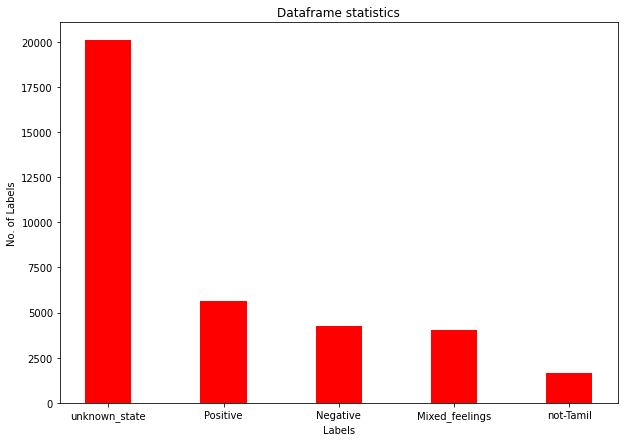

Positive          20070
unknown_state      5628
Negative           4271
Mixed_feelings     4020
not-Tamil          1667
Name: category, dtype: int64

In [26]:
#Fitting Labels
train['category'] = train['category'].str.strip()

#Visualizing datas
Labels =  train['category'].unique()
count =   train['category'].value_counts()
  
fig = plt.figure(figsize = (10, 7))

# creating the bar plot
plt.bar(Labels, count, color ='red',  width = 0.4)
 
plt.xlabel("Labels")
plt.ylabel("No. of Labels")
plt.title("Dataframe statistics")
plt.show()

#Label counts
train['category'].value_counts()

## Removing punctuations

In [27]:
#removing punctuations
import string
def remove_punctuations(txt):
    text_nopunc="".join([c for c in txt if c not in string.punctuation])
    return text_nopunc

train['text']=train['text'].apply(lambda x: remove_punctuations(x))



In [28]:
#Label encoder
from sklearn.preprocessing import LabelEncoder
Encoder = LabelEncoder()
train['category']=Encoder.fit_transform(train['category'])
dev['category']= Encoder.fit_transform(dev['category'])

In [29]:
train['category'].value_counts()

2    20070
4     5628
1     4271
0     4020
3     1667
Name: category, dtype: int64

# **Models**

# Multilayer Perceptron

In [30]:
from keras.preprocessing.text import one_hot

#use onehot in train
voc_size = 1000

train_onehot = [one_hot(words, voc_size)for words in train['text']]
dev_onehot = [one_hot(words, voc_size)for words in dev['text']]
test_onehot = [one_hot(words, voc_size)for words in test['text']]

In [31]:
#from keras.layers import Embedding
#from keras.models import Sequential
from keras.preprocessing.sequence import pad_sequences

sent_length=20
embedded_train = pad_sequences(train_onehot,padding='pre',maxlen=sent_length)
embedded_dev = pad_sequences(dev_onehot,padding='pre',maxlen=sent_length)
embedded_test = pad_sequences(test_onehot,padding='pre',maxlen=sent_length)


In [35]:

X_train = np.array(embedded_train)
y_train = np.array(train['category'])

X_dev =  np.array(embedded_dev)
y_dev = np.array(dev['category'])

X_test =  np.array(embedded_test)


In [36]:
#Building Neural network

dim = 40
classifier = Sequential()

model.add(Embedding(voc_size,dim,input_length=sent_length, trainable=True))
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = len(train.category.value_counts()), kernel_initializer = 'uniform', activation = 'relu', input_dim = 20))

# Adding the second hidden layer
classifier.add(Dense(units = len(train.category.value_counts()), kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 5, kernel_initializer = 'uniform', activation = 'softmax'))

# Compiling the ANN
#classifier.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
classifier.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False),
              metrics=['accuracy'])

# Fitting the ANN to the Training set
history = classifier.fit(X_train, y_train, batch_size =100 , epochs = 150,validation_data=(X_dev, y_dev))


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/150
357/357 [==============================] - 2s 4ms/step - loss: 1.4153 - accuracy: 0.5306 - val_loss: 1.2719 - val_accuracy: 0.5697
Epoch 2/150
357/357 [==============================] - 1s 3ms/step - loss: 1.2782 - accuracy: 0.5627 - val_loss: 1.2659 - val_accuracy: 0.5697
Epoch 3/150
357/357 [==============================] - 1s 3ms/step - loss: 1.2678 - accuracy: 0.5656 - val_loss: 1.2621 - val_accuracy: 0.5697
Epoch 4/150
357/357 [==============================] - 1s 3ms/step - loss: 1.2640 - accuracy: 0.5644 - val_loss: 1.2551 - val_accuracy: 0.5697
Epoch 5/150
357/357 [==============================] - 1s 3ms/step - loss: 1.2591 - accuracy: 0.5639 - val_loss: 1.2499 - val_accuracy: 0.5697
Epoch 6/150
357/357 [==============================] - 1s 3ms/step - loss: 1.2650 - accuracy: 0.5569 - val_loss: 1.2479 - val_accuracy: 0.5697
Epoch 7/150
357/357 [==============================] - 1s 3ms/step - loss: 1.2487 - accuracy: 0.5633 - val_loss: 1.2454 - val_accuracy: 0.5697

In [37]:
#classified with test set
y_pred_test_NN = classifier.predict(X_test)

# LSTM

Word2vec One_hot

In [38]:
from keras.preprocessing.text import one_hot

#use onehot in train
voc_size = 1000

train_onehot = [one_hot(words, voc_size)for words in train['text']]
dev_onehot = [one_hot(words, voc_size)for words in dev['text']]
test_onehot = [one_hot(words, voc_size)for words in test['text']]

In [39]:
#performing pad_sequences
from keras.preprocessing.sequence import pad_sequences

sent_length=20
embedded_train=pad_sequences(train_onehot,padding='pre',maxlen=sent_length)
embedded_dev=pad_sequences(dev_onehot,padding='pre',maxlen=sent_length)
embedded_test = pad_sequences(test_onehot,padding='pre',maxlen=sent_length)

In [40]:
#spliting datas for training
train['category_category'] = pd.Categorical(train['category'])

X_train = np.array(embedded_train)
y_train = np.array(train['category'])

X_dev =  np.array(embedded_dev)
y_dev = np.array(dev['category'])

X_test =  np.array(embedded_test)

In [42]:
dim=40
model=Sequential()

#embedding layer
model.add(Embedding(voc_size,dim,input_length=sent_length))
#input layer
#model.add(LSTM(100)
model.add(LSTM(1000, input_shape=(1000,1), return_sequences=False))
#hidded layer
model.add(Dense(500, activation='relu', kernel_regularizer=regularizers.l2(0.01), ))
#output layer
model.add(Dense(5, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False),
              metrics=['accuracy'])

#model.compile('adam','mse')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [43]:
#summary of LSTM model
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 20, 40)            40000     
_________________________________________________________________
lstm_1 (LSTM)                (None, 1000)              4164000   
_________________________________________________________________
dense_8 (Dense)              (None, 500)               500500    
_________________________________________________________________
dense_9 (Dense)              (None, 5)                 2505      
Total params: 4,707,005
Trainable params: 4,707,005
Non-trainable params: 0
_________________________________________________________________


In [44]:
history = model.fit(X_train, y_train, 
                    batch_size=64,
                    epochs=50, validation_data=(X_dev, y_dev)                 
                    )

Epoch 1/50
558/558 [==============================] - 24s 39ms/step - loss: 2.1520 - accuracy: 0.5552 - val_loss: 1.1581 - val_accuracy: 0.5727
Epoch 2/50
558/558 [==============================] - 21s 38ms/step - loss: 1.1162 - accuracy: 0.5766 - val_loss: 1.1205 - val_accuracy: 0.5835
Epoch 3/50
558/558 [==============================] - 21s 38ms/step - loss: 1.0788 - accuracy: 0.5894 - val_loss: 1.0923 - val_accuracy: 0.5868
Epoch 4/50
558/558 [==============================] - 21s 38ms/step - loss: 1.0452 - accuracy: 0.5980 - val_loss: 1.0831 - val_accuracy: 0.5891
Epoch 5/50
558/558 [==============================] - 21s 38ms/step - loss: 1.0318 - accuracy: 0.6012 - val_loss: 1.0870 - val_accuracy: 0.5810
Epoch 6/50
558/558 [==============================] - 21s 38ms/step - loss: 1.0103 - accuracy: 0.6123 - val_loss: 1.0922 - val_accuracy: 0.5760
Epoch 7/50
558/558 [==============================] - 21s 38ms/step - loss: 1.0083 - accuracy: 0.6146 - val_loss: 1.0773 - val_accuracy:

In [ ]:
#classified with test set
y_pred_test_LSTM = model.predict(X_test)